In [1]:
import pandas as pd
import seaborn as sns

In [72]:
import numpy as np
import matplotlib.pyplot as plt

### Loading Dataset file 

In [33]:
col_list = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class']
adult_df = pd.read_csv('Dataset.data',sep=' ',names=col_list)
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [34]:
adult_df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


### Checking shape of the data

In [35]:
adult_df.shape

(48842, 15)

### Checking the distribution of salary in our dataset

In [173]:
print('% of <=50K salary in whole dataset','  ',len(adult_df[adult_df['class']=='<=50K'])/ adult_df.shape[0])
print('% of >50K salary in whole dataset','  ',len(adult_df[adult_df['class']=='>50K'])/ adult_df.shape[0])

% of <=50K salary in whole dataset    0.7607182343065395
% of >50K salary in whole dataset    0.23928176569346055


### Check for NULL values in the dataset

In [36]:
adult_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

### Check for Redundant values in the dataset

In [37]:
for col in col_list:
    print(col,' ',adult_df[adult_df[col]=='?'][col].count())

age   0
workclass   2799
fnlwgt   0
education   0
education-num   0
marital-status   0
occupation   2809
relationship   0
race   0
sex   0
capital-gain   0
capital-loss   0
hours-per-week   0
native-country   857
class   0


/home/neha/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


### Filling NaN values for the redundant ones 

In [45]:
redundant_col_list = ['workclass','occupation','native-country']
for col in redundant_col_list:
    adult_df[col] = np.where(adult_df[col]=='?',np.NaN, adult_df[col])

In [46]:
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [47]:
adult_df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

### Dropping Null values as there are less in number as comparison to the total number of records in the dataframe

In [48]:
adult_df.shape

(48842, 15)

In [57]:
clean_adult_df = adult_df.dropna()

In [58]:
clean_adult_df.shape

(45222, 15)

In [61]:
clean_adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


### Transforming class feature to 0,1 for simplification 

In [66]:
clean_adult_df.loc[clean_adult_df['class']=='<=50K','class'] = 0
clean_adult_df.loc[clean_adult_df['class']=='>50K','class'] = 1

/home/neha/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [68]:
clean_adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


## Let's Start with Exploratory Data Analysis

### UNIVARIATE ANALYSIS

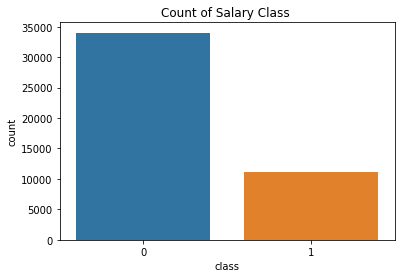

In [73]:
plt.title('Count of Salary Class ')
sns.countplot(clean_adult_df['class'])

### This clearly shows that 75% of the whole population has salary <=50K 

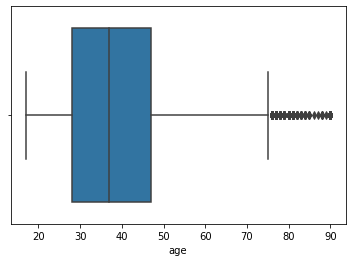

In [103]:
sns.boxplot(clean_adult_df['age'])

### This shows that age has many outliers value 

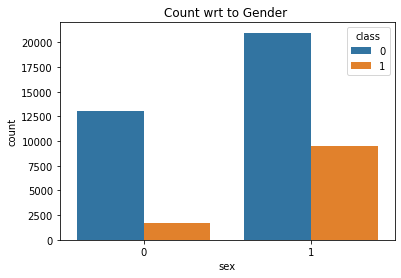

In [165]:
plt.title('Count wrt to Gender ')
sns.countplot(clean_adult_df['sex'],hue=clean_adult_df['class'])

### The above graph clearly shows the distribution of gender on the basis of class of salary 

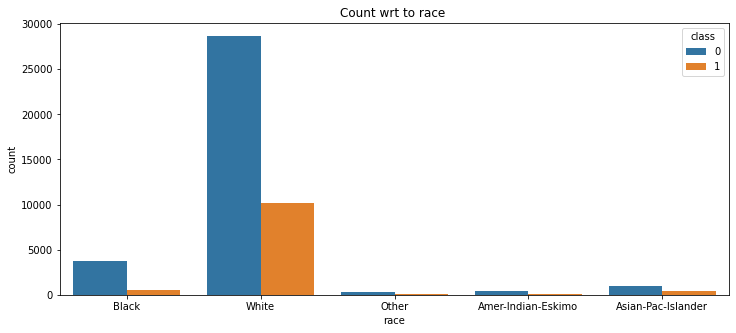

In [89]:
plt.figure(figsize=(12,5))
plt.title('Count wrt to race ')
sns.countplot(clean_adult_df['race'],hue=clean_adult_df['class'])

### The above graph clearly shows the distribution of RACE on the basis of class of salary 

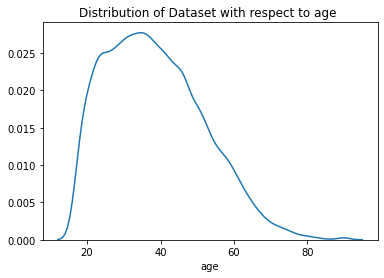

In [78]:
plt.title('Distribution of Dataset with respect to age ')
sns.distplot(clean_adult_df['age'],hist=False)

### The above graph shows that age of the whole population is normally distributed

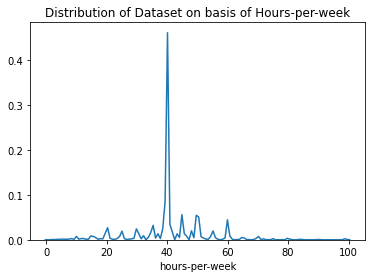

In [87]:
plt.title('Distribution of Dataset on basis of Hours-per-week')
sns.distplot(clean_adult_df['hours-per-week'],hist=False)

### The above graph indicates that the distribution of Hours per week is multi-modal in nature

## BIVARIATE ANALYSIS

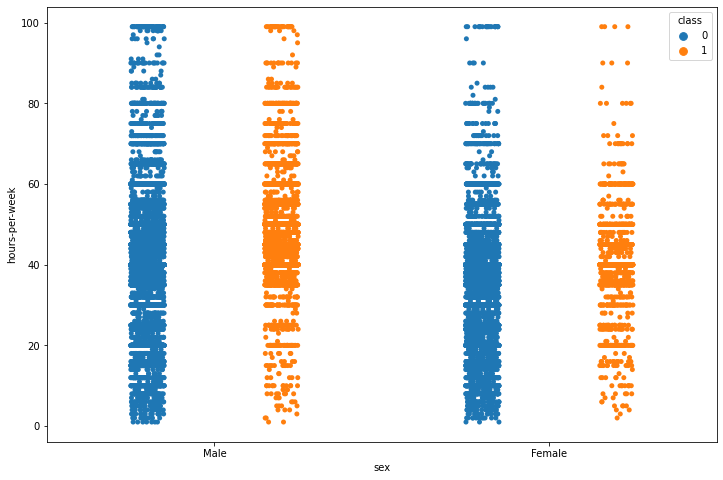

In [102]:
plt.figure(figsize=(12,8))
sns.stripplot('sex','hours-per-week',data=clean_adult_df,hue='class',jitter=True,dodge=True)

### The above graph shows the distribution of gender wrt hours per week

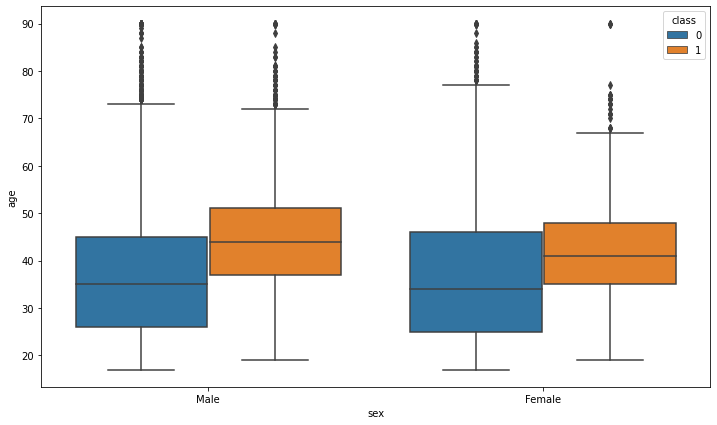

In [108]:
plt.figure(figsize=(12,7))
sns.boxplot('sex','age',data=clean_adult_df, hue='class')

### The above graph shows the distribution of gender wrt age in boxplot manner

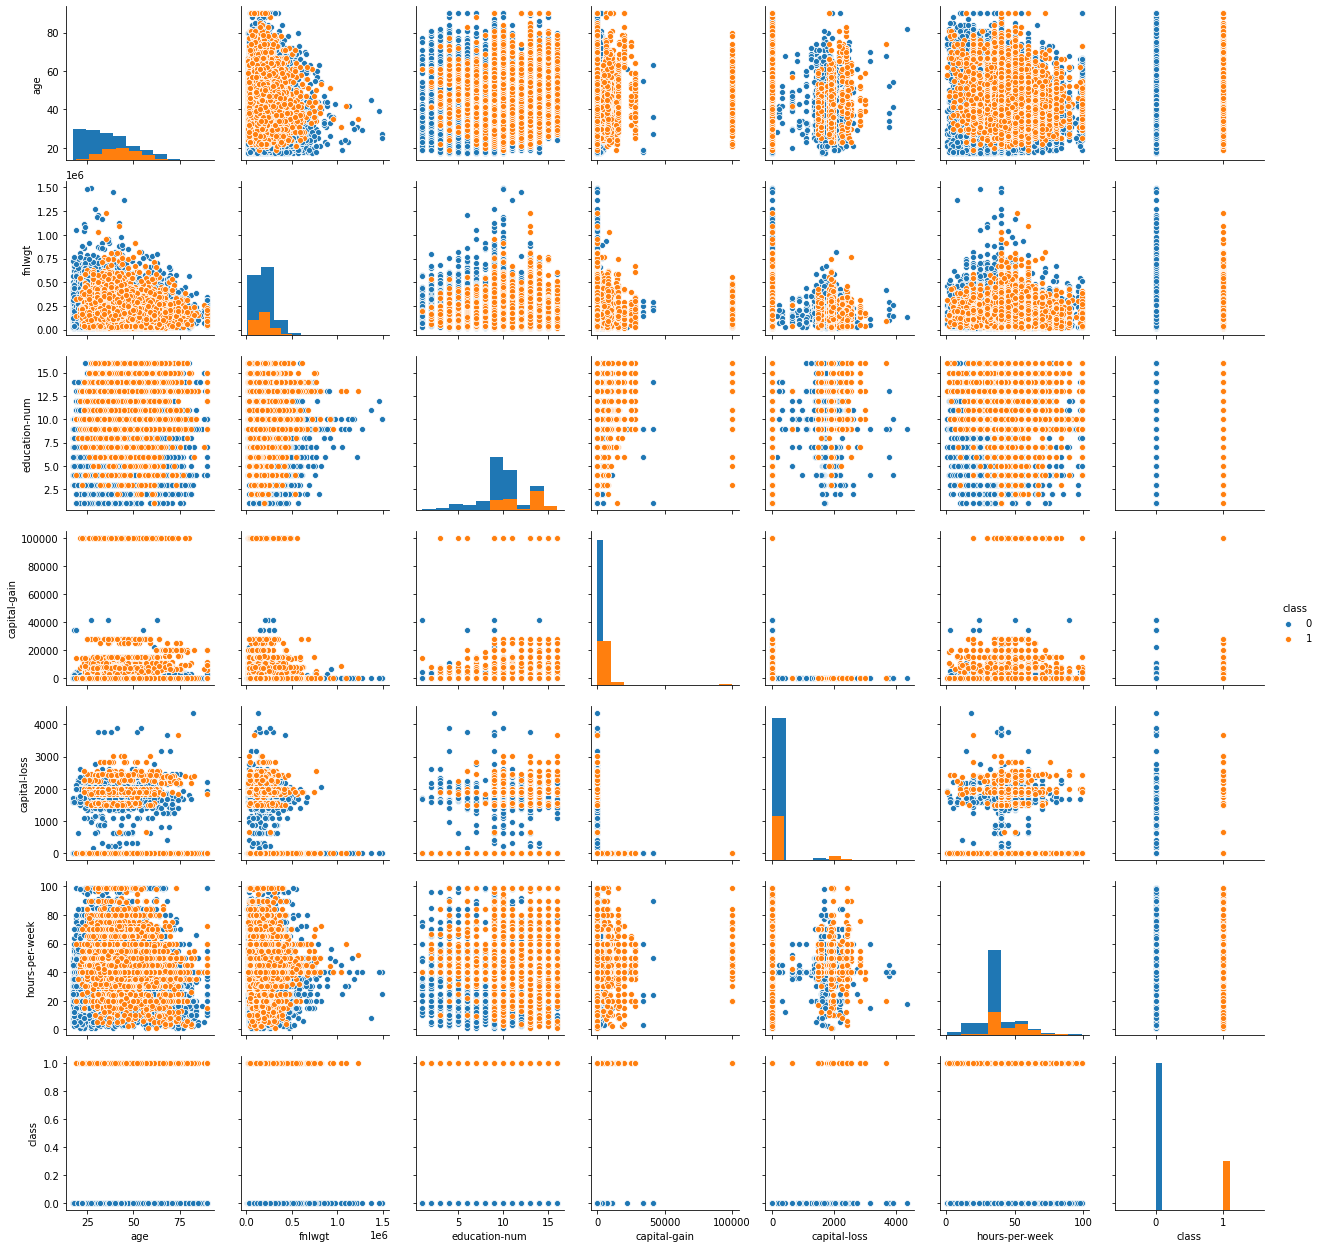

In [111]:
sns.pairplot(clean_adult_df, hue='class', diag_kind='hist')

### The above is the pairplot between different features in the dataset

## Building ML model for the same

#### Importing necessary libraries

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [113]:
clean_adult_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   fnlwgt          45222 non-null  int64 
 3   education       45222 non-null  object
 4   education-num   45222 non-null  int64 
 5   marital-status  45222 non-null  object
 6   occupation      45222 non-null  object
 7   relationship    45222 non-null  object
 8   race            45222 non-null  object
 9   sex             45222 non-null  object
 10  capital-gain    45222 non-null  int64 
 11  capital-loss    45222 non-null  int64 
 12  hours-per-week  45222 non-null  int64 
 13  native-country  45222 non-null  object
 14  class           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.8+ MB


### Changing the datatype of our class feature, which is our label

In [118]:
clean_adult_df['class'] = clean_adult_df['class'].astype('int32')

/home/neha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Extracting categorical and numerical column list from the dataset

In [120]:
category_col_list = list(clean_adult_df.select_dtypes(include=['object']))
numeric_col_list = list(clean_adult_df.select_dtypes(exclude=['object']))

category_col_list

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

### Transforming categorical variable to numeric type with LabelEncoder

In [123]:
le = LabelEncoder()

In [125]:
for col in category_col_list:
    clean_adult_df[col] = le.fit_transform(clean_adult_df[col])

/home/neha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [126]:
clean_adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,38,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,38,0


## Performing Train test split 

In [127]:
X = clean_adult_df.drop('class', axis=1)
Y = clean_adult_df['class']

In [128]:
train_x, test_x , train_y , test_y = train_test_split(X,Y,stratify= Y, test_size = 0.20,random_state= 56)

In [129]:
train_x.shape, test_x.shape

((36177, 14), (9045, 14))

## Trying Logistic Regression Approach

In [130]:
lr_model = LogisticRegression()

In [131]:
lr_model.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [132]:
pred = lr_model.predict(test_x)

In [135]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      6803
           1       0.75      0.26      0.38      2242

    accuracy                           0.79      9045
   macro avg       0.77      0.61      0.63      9045
weighted avg       0.79      0.79      0.75      9045



### Trying Decision Tree classifier

In [139]:
from sklearn.tree import DecisionTreeClassifier

In [148]:
dt_model = DecisionTreeClassifier(criterion='gini')

In [149]:
dt_model.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [150]:
pred2 = dt_model.predict(test_x)

In [151]:
print(classification_report(pred2, test_y))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      6780
           1       0.63      0.62      0.62      2265

    accuracy                           0.81      9045
   macro avg       0.75      0.75      0.75      9045
weighted avg       0.81      0.81      0.81      9045



### Trying Ensemble method 

In [152]:
from sklearn.ensemble import RandomForestClassifier

In [153]:
rf_model = RandomForestClassifier()

In [154]:
rf_model.fit(train_x, train_y)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [155]:
pred3 = rf_model.predict(test_x)

In [156]:
print(classification_report(pred3, test_y))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      7169
           1       0.62      0.74      0.68      1876

    accuracy                           0.85      9045
   macro avg       0.78      0.81      0.79      9045
weighted avg       0.87      0.85      0.86      9045



In [161]:
rf_model_2 = RandomForestClassifier(n_estimators=250, n_jobs=-1, criterion='entropy', min_samples_split=4)

In [162]:
rf_model_2.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [163]:
pred4 = rf_model_2.predict(test_x)

In [164]:
print(classification_report(pred4, test_y))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      7158
           1       0.62      0.74      0.68      1887

    accuracy                           0.85      9045
   macro avg       0.78      0.81      0.79      9045
weighted avg       0.86      0.85      0.86      9045

